In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from lib.query import write_query, query_to_df
from lib.units import ra_to_deg

In [3]:
# copied from ChatGPT
catalog = {
    "NGC_1261": {
        "ra": "03h12m16.21s",
        "dec": -55.2170,
        "tidal_radius": 15.8  # Tidal radius in arcminutes
    },
    "NGC_3201": {
        "ra": "10h17m36.82s",
        "dec": -46.4111,
        "tidal_radius": 28.3
    },
    "NGC_6139": {
        "ra": "16h27m40.36s",
        "dec": -38.8481,
        "tidal_radius": 13.2
    },
    "NGC_6205": {
        "ra": "16h41m41.24s",
        "dec": 36.4603,
        "tidal_radius": 21.0
    },
    "NGC_6362": {
        "ra": "17h31m54.99s",
        "dec": -67.0483,
        "tidal_radius": 15.4
    },
    "NGC_6397": {
        "ra": "17h40m42.09s",
        "dec": -53.6743,
        "tidal_radius": 9.9
    },
    "NGC_6712": {
        "ra": "18h53m04.30s",
        "dec": -8.7058,
        "tidal_radius": 16.0
    },
    "Pal_13": {
        "ra": "23h06m44.98s",
        "dec": 12.7719,
        "tidal_radius": 1.3
    }
}

In [4]:
ra_to_deg(catalog["NGC_6712"]["ra"])

283.2679166666667

In [15]:
query = write_query(
    ra_to_deg(catalog["NGC_6712"]["ra"]),
    catalog["NGC_6712"]["dec"],
    "CIRCLE",
    catalog["NGC_6712"]["tidal_radius"] / 60,
    limit=None
)

# print(query)

df = query_to_df(query)

In [35]:
for object, values in catalog.items():
    query = write_query(
        ra_to_deg(values["ra"]),
        values["dec"],
        "CIRCLE",
        (values["tidal_radius"] / 60) * 2, # twice the tidal radius(in deg)
        limit=30000,
        all_rows=True,
    )
    df = query_to_df(query)
    df.to_csv(f"datasets/{object}.csv", index=False)

    print(f"created {object}.csv {df.shape} objects")

created NGC_1261.csv (11258, 153) objects
created NGC_3201.csv (30000, 153) objects
created NGC_6139.csv (30000, 153) objects
created NGC_6205.csv (25261, 153) objects
created NGC_6362.csv (30000, 153) objects
created NGC_6397.csv (30000, 153) objects
created NGC_6712.csv (30000, 153) objects
created Pal_13.csv (123, 153) objects


(30000, 153)


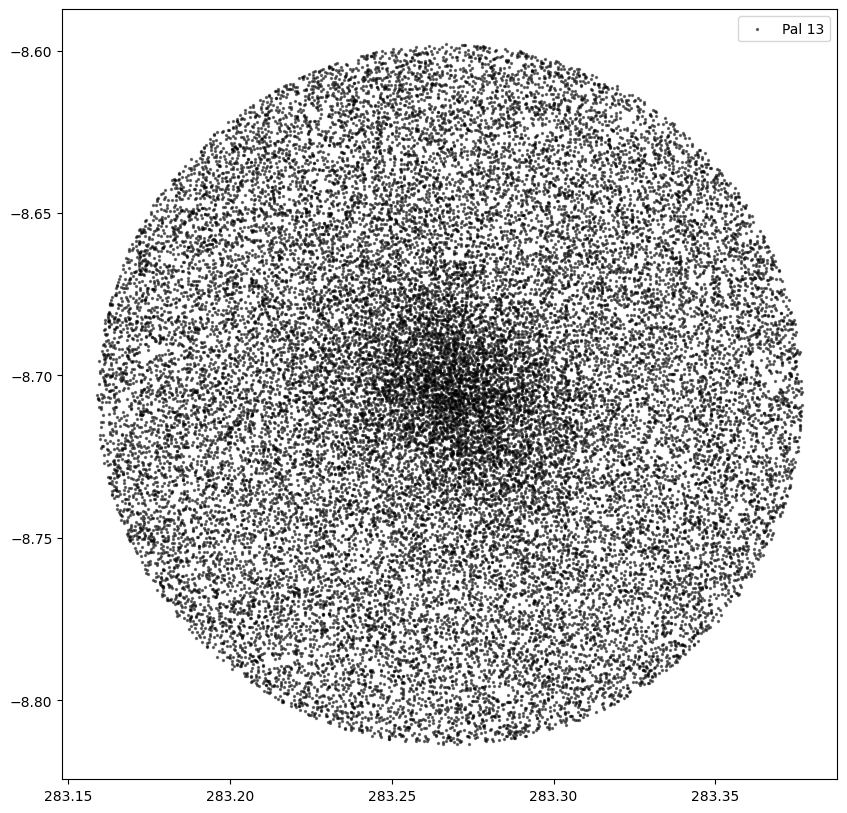

In [44]:
ngc1261 = pd.read_csv('datasets/NGC_6712.csv')

print(ngc1261.shape)
plt.figure(figsize=(10,10))
plt.scatter(ngc1261.ra, ngc1261.dec, c = 'k', alpha = .5, s = 2, label = "Pal 13")
plt.legend()
plt.show()